In [132]:
!pip install xgboost

In [133]:
!pip install LightGBM

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib notebook
import sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [91]:
electric_sb = pd.read_csv('grid_stability.csv')

In [92]:
electric_sb.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [93]:
electric_sb.tail()

tau1      tau2      tau3      tau4        p1        p2        p3  \
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      stab     stabf  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  0.023892  unstable  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120 -0.025803    stable  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984 -0.031810    stable  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  0.037789  unstable  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  0.045263  unstable

In [94]:
electric_sb.shape

(10000, 14)

In [95]:
electric_sb.size

140000

In [96]:
electric_sb.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [97]:
electric_sb.describe()

tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035      0.274256      0.274255   
min       -1.999891     -1.999945     -1.999926      0.050009      0.050053   
25%       -1.624901     -1.625025     -1.624960      0.287521      0.287552   
50%       -1.249966     -1.249974     -1.250007      0.525009      0.525003   
75%       -0.874977     -0.875043     -0.875065      0.762435      0.762490   
max       -0.500108     -0.500072     -0.500025      0.999937      0.999944   

                 g3            g4          stab  
count  10000.000000  10000.000000  10000.000000  
mean       0.525000      0.525000      0.015731  
std        0.274255      0.274255      0.036919  
min        0.050054      0.050028     -0.080760  
25%        0.287514      0.287494     -0.015557  
50%        0.525015      0.525002      0.017142  
75%        0.762440      0.762433      0.044878  
max        0.999982      0.999930      0.109403

In [98]:
electric_sb['p1'].sum()

37499.9995793617

In [99]:
electric_sb['p2'].sum()+electric_sb['p3'].sum()+ electric_sb['p4'].sum()

-37499.99957936169

In [100]:
# power produced by the supplier node would be passed on to the consumer node i.e p2, p3,p4.
# p1 = -(p2+p3+p4)
electric_sb.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [101]:
# there are no missing values

In [102]:
electric_sb = electric_sb.drop(columns ='stab')

In [103]:
# stab <=0 then it is stable and if stab>0 then it is unstable 
# lets remove the stab column at make it as binary classification model

In [104]:
electric_sb.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  unstable

In [105]:
# Now there are total now 13 attributes from which 12 are independent variables and stabf 1 is an dependent Variable.

# EDA(Exploratory Data Analysis)

In [106]:
features = electric_sb.drop(columns ='stabf')
target = electric_sb['stabf']

In [107]:
features.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  
1 -1.255012  0.413441  0.862414  0.562139  0.781760  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  
4 -0.554305  0.797110  0.455450  0.656947  0.820923

In [108]:
target.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

In [109]:
target.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [110]:
# we can say this data as an imbalanced dataset where stable class has 3000 less instances then the unstable class

In [111]:
def hist(features):
    fig,ax = plt.subplots(figsize=(10,10), nrows = 3 , ncols =4)
    for feature, axes in zip(features, ax.flatten()):
        axes.hist(features[feature], bins =28)
        axes.set_title(f'Histogram of {feature}', weight='bold')
        axes.set_xlabel(f'{feature}', size=12, weight='bold')
        axes.set_ylabel('Frequency Distribution', weight='bold')
    fig.tight_layout()

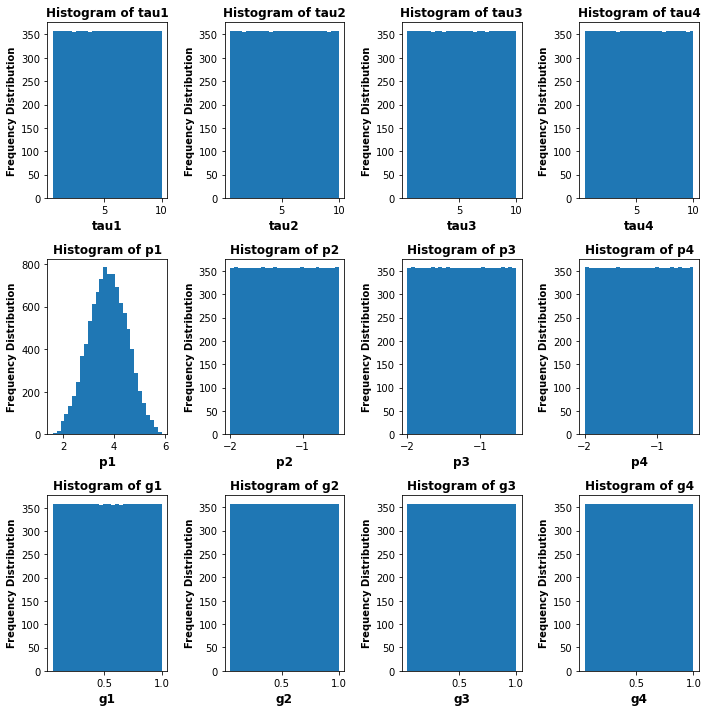

In [112]:
hist(features)

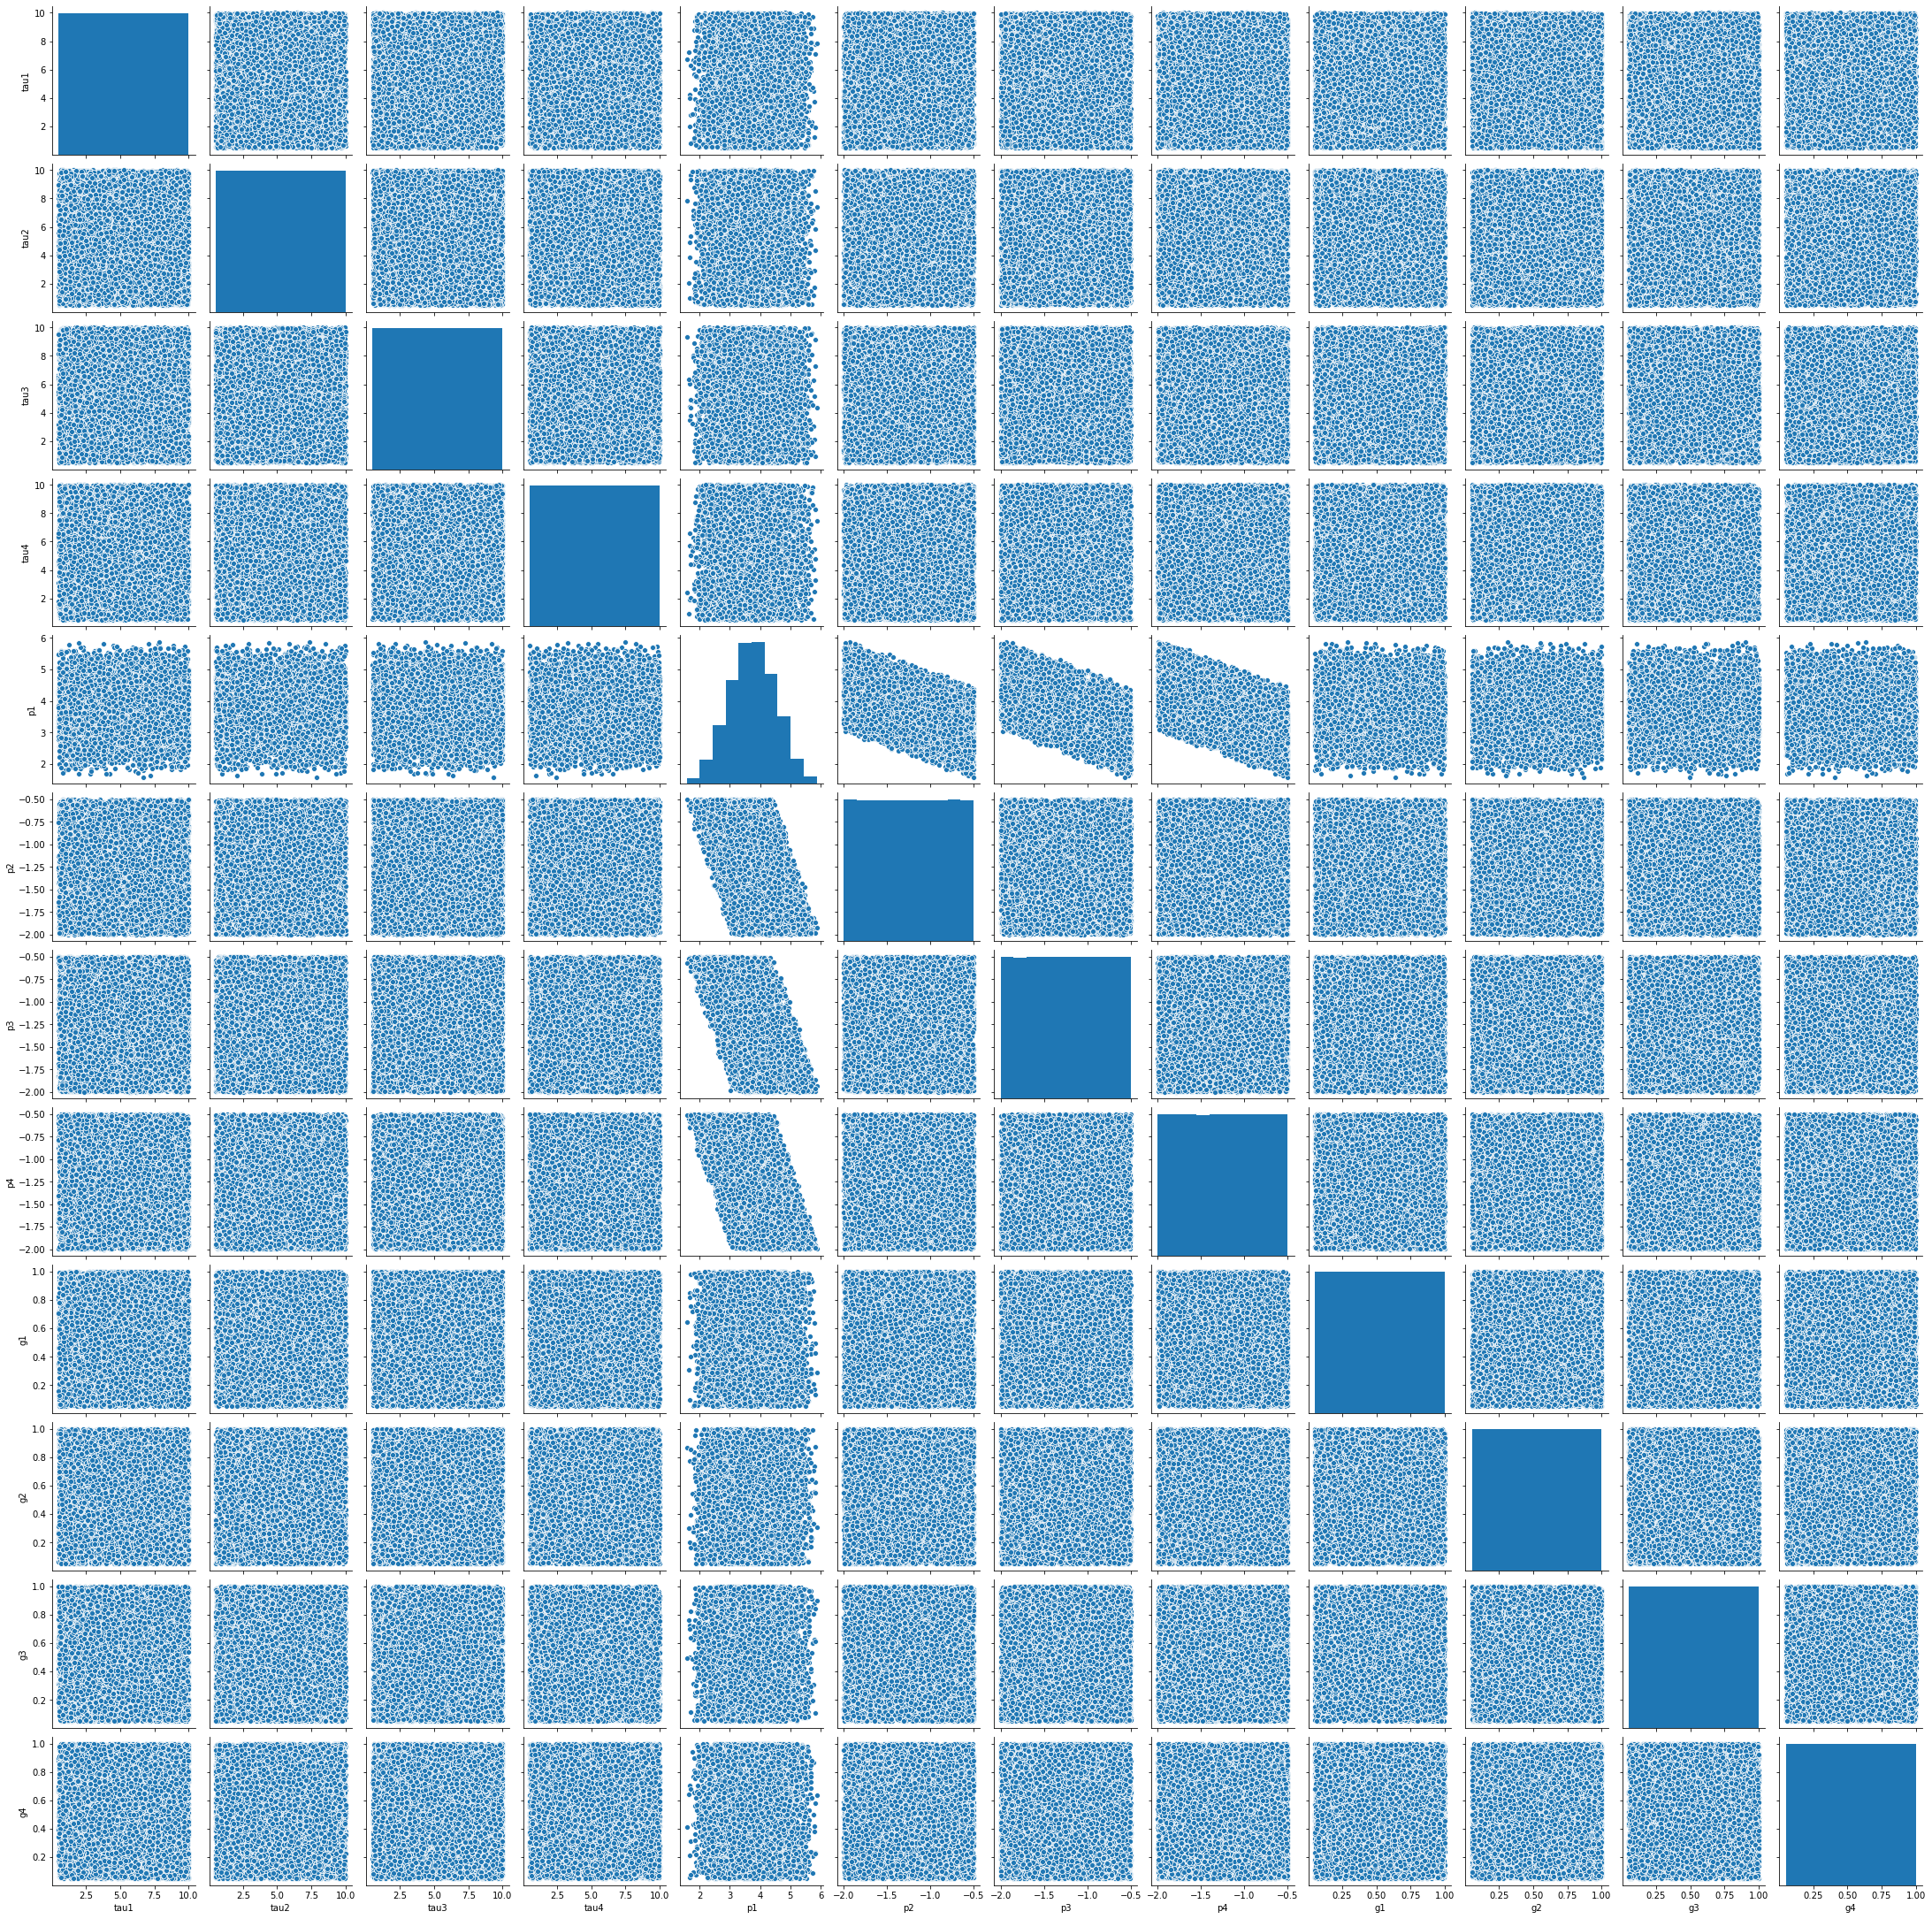

In [114]:
sns.pairplot(features)
plt.show()

In [115]:
corr = features.corr()
corr

tau1      tau2      tau3      tau4        p1        p2        p3  \
tau1  1.000000  0.015586 -0.005970 -0.017265  0.027183 -0.015485 -0.015924   
tau2  0.015586  1.000000  0.014273 -0.001965 -0.004769  0.006573  0.007673   
tau3 -0.005970  0.014273  1.000000  0.004354  0.016953 -0.003134 -0.008780   
tau4 -0.017265 -0.001965  0.004354  1.000000 -0.003173  0.010553  0.006169   
p1    0.027183 -0.004769  0.016953 -0.003173  1.000000 -0.573157 -0.584554   
p2   -0.015485  0.006573 -0.003134  0.010553 -0.573157  1.000000  0.002388   
p3   -0.015924  0.007673 -0.008780  0.006169 -0.584554  0.002388  1.000000   
p4   -0.015807 -0.005963 -0.017531 -0.011211 -0.579239 -0.006844  0.012953   
g1    0.010521 -0.001742 -0.011605 -0.004149  0.000721  0.015603 -0.003219   
g2    0.015350  0.015383  0.007671  0.008431  0.015405 -0.018032 -0.011575   
g3   -0.001279  0.016508  0.014702  0.003260  0.001069  0.007555 -0.005897   
g4    0.005494 -0.011764 -0.011497 -0.000491 -0.015451  0.019817 -0.010485   

            p4        g1        g2        g3        g4  
tau1 -0.015807  0.010521  0.015350 -0.001279  0.005494  
tau2 -0.005963 -0.001742  0.015383  0.016508 -0.011764  
tau3 -0.017531 -0.011605  0.007671  0.014702 -0.011497  
tau4 -0.011211 -0.004149  0.008431  0.003260 -0.000491  
p1   -0.579239  0.000721  0.015405  0.001069 -0.015451  
p2   -0.006844  0.015603 -0.018032  0.007555  0.019817  
p3    0.012953 -0.003219 -0.011575 -0.005897 -0.010485  
p4    1.000000 -0.013636  0.002850 -0.003515  0.017505  
g1   -0.013636  1.000000  0.007559 -0.005836  0.012431  
g2    0.002850  0.007559  1.000000 -0.012809 -0.014909  
g3   -0.003515 -0.005836 -0.012809  1.000000  0.006900  
g4    0.017505  0.012431 -0.014909  0.006900  1.000000

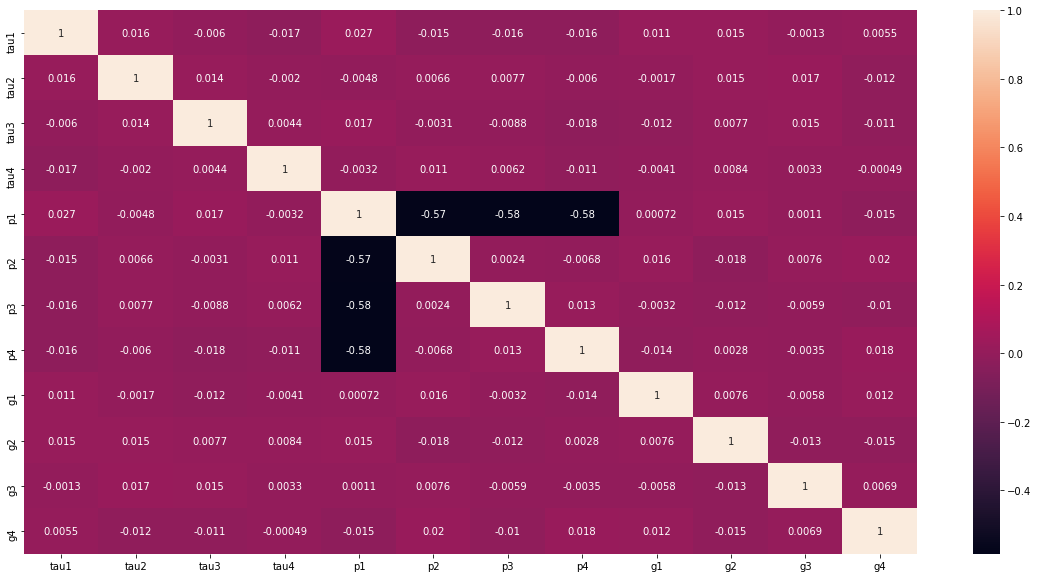

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot =True)
plt.show()

# feature scaling

In [145]:
sc = StandardScaler()
features_scaled = sc.fit_transform(features)

# Splitting the dataset

In [146]:
# by using train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target,test_size=0.2, random_state =1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 12), (8000,), (2000, 12), (2000,))

In [166]:
x_train

array([[ 0.36682875, -0.98730625,  0.64713467, ...,  0.34058582,
         0.5861215 ,  0.49258696],
       [-0.06542389,  0.08760613,  1.03036469, ..., -1.55978146,
         1.42923215, -1.44306055],
       [-1.46948331,  1.29594952, -0.50164618, ...,  1.45344303,
        -1.04331429,  0.49283674],
       ...,
       [ 0.65729014, -0.7241597 , -1.40170538, ...,  0.29377704,
        -1.54757792,  0.81067305],
       [-0.06007786, -1.26165251, -1.00773016, ..., -0.38830311,
        -0.7247187 ,  1.66819457],
       [-1.47485031,  0.63631717,  0.24826919, ..., -1.17499446,
         1.17915327,  0.78395706]])

# RandomForestClassifier

In [147]:
rf =RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)
# Lets do predictions on the basis of RandomForest Classifier 
rf_predict=rf.predict(x_test)
print('Accuracy_score:', round(accuracy_score(y_test, rf_predict),4))
print("Confusion Matrix:", confusion_matrix(y_test,rf_predict))

Accuracy_score: 0.929
Confusion Matrix: [[ 625   87]
 [  55 1233]]


In [129]:
ec =ExtraTreesClassifier(random_state=1)
ec.fit(x_train,y_train)

ec_pred = ec.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,ec_pred))
print('COnfusion Matrix:', confusion_matrix(y_test, ec_pred))

Accuracy Score: 0.928
COnfusion Matrix: [[ 606  106]
 [  38 1250]]


In [138]:
precision = 355/1835

In [139]:
recall = 355/(355+45)

In [140]:
recall

0.8875

In [141]:
precision

0.19346049046321526

In [142]:
f1_score = 2*((precision *recall)/(precision + recall))

In [143]:
f1_score

0.3176733780760626

In [167]:
xgb = XGBClassifier(random_state =1)
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)
accuracy_score(y_test, xgb_pred)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9455

In [151]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,
'min_samples_leaf': min_samples_leaf,
'min_samples_split': min_samples_split,
'max_features': max_features}

ec1 =ExtraTreesClassifier(random_state=1)

rcv =RandomizedSearchCV(estimator=ec1, param_distributions=hyperparameter_grid, cv=5,\
                       n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1, random_state =1)

In [154]:
rcv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [155]:
rcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [157]:
ec2 =ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf =8, max_features=None)

In [159]:
ec2.fit(x_train, y_train)
accuracy_score(y_test, ec2.predict(x_test))

0.93

In [160]:
ec2.feature_importances_

array([0.1374603 , 0.14067544, 0.13432958, 0.13479811, 0.00376853,
       0.0054694 , 0.00541056, 0.00514895, 0.10288646, 0.10764914,
       0.11272549, 0.10967805])

In [161]:
min(ec2.feature_importances_)

0.003768528837701086

In [163]:
max(ec2.feature_importances_)

0.14067543896497137

In [164]:
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(x_train, y_train)

LGBMClassifier(random_state=1)

In [165]:
accuracy_score(y_test, lgbm.predict(x_test))

0.94

In [168]:
import xgboost.